In [11]:
import pandas as pd
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv('seoul-bike-data-clean.csv', encoding='unicode_escape')
X = data.drop(['Rented Bike Count'], axis=1)
y = data['Rented Bike Count']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf2 = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models2,predictions2 = clf2.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:34<00:00,  1.23it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1233
[LightGBM] [Info] Number of data points in the train set: 4380, number of used features: 19
[LightGBM] [Info] Start training from score 710.487443


In [14]:
print(models2)

                                    Adjusted R-Squared  \
Model                                                    
HistGradientBoostingRegressor                     0.89   
XGBRegressor                                      0.89   
LGBMRegressor                                     0.88   
ExtraTreesRegressor                               0.88   
RandomForestRegressor                             0.88   
BaggingRegressor                                  0.86   
GradientBoostingRegressor                         0.85   
DecisionTreeRegressor                             0.77   
ExtraTreeRegressor                                0.74   
GaussianProcessRegressor                          0.72   
KNeighborsRegressor                               0.72   
PoissonRegressor                                  0.62   
AdaBoostRegressor                                 0.61   
MLPRegressor                                      0.59   
LinearRegression                                  0.55   
TransformedTar

In [23]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [24]:
# Assuming 'Rented Bike Count' is the target variable
df = pd.read_csv('seoul-bike-data-clean.csv', encoding='unicode_escape')
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

# Select only numerical features for simplicity
X = X.select_dtypes(include=['float64', 'int64'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Initialize the HistGradientBoostingRegressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor()

In [26]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 58666.7034525685


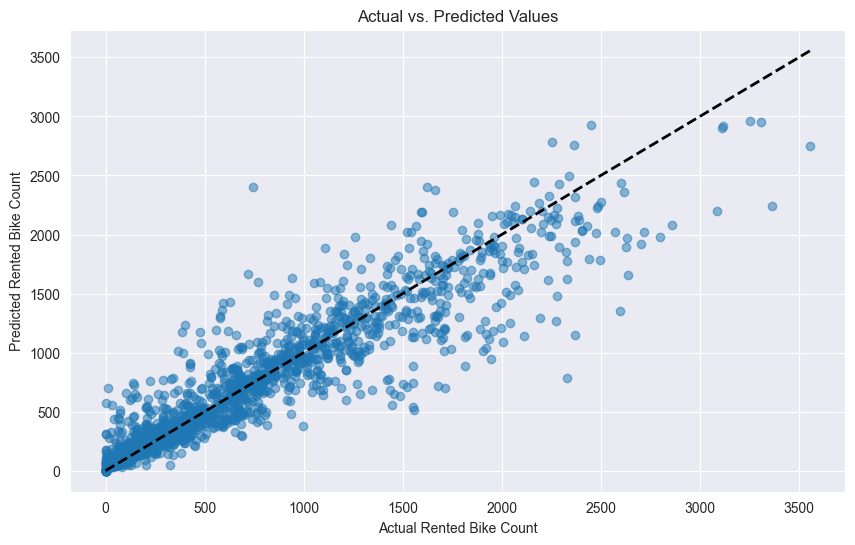

In [27]:
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(X_test)

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()


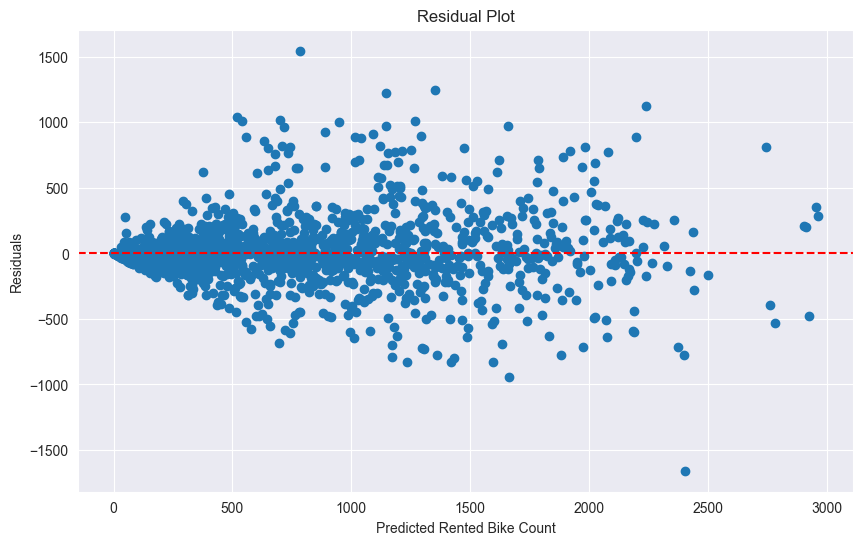

In [28]:
# Calculate residuals
residuals = y_test - predictions

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.show()


In [29]:
# Get feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


NameError: name 'np' is not defined